# Análise dos números da Mega Sena

<strike>Projeto realizado com os dados históricos dos sorteios realizados até 10/08/2019: <u>Concurso 2178</u> <br> </strike>

Projeto adaptado para trabalhar com as versões mais recentes do sorteio.

* <b>Parte 1:</b> Análise Exploratória dos Dados <br>
* <b>Parte 2:</b> Testes Estatísticos <br>
* <b>Parte 3:</b> Utilizando LSTM para prever um jogo vencedor

site: http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/

## Análise Exploratória dos Dados

In [42]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from config import DOWNLOAD_PATH, FILENAME

from functions import download_raffle_file
from functions import transform_html_to_csv
from functions import pre_process_dataframe
from functions import get_working_dir_path

In [43]:
save_path = get_working_dir_path()

In [44]:
download_raffle_file(url=DOWNLOAD_PATH, path=save_path, filename=FILENAME)
transform_html_to_csv(path=save_path, filename=FILENAME)

In [45]:
mega_sena = pre_process_dataframe(filename=FILENAME, drop=['Cidade', 'UF'])

In [46]:
# Definindo nome das colunas
names = ['Data', '1_n', '2_n','3_n', '4_n', '5_n', '6_n', 'Arrec', 'Sena', 'Valor_Sena', 'Quina',
         'Valor_Quina', 'Quadra', 'Valor_Quadra', 'Acumulado', 'Valor_Acumulado', 'Estimativa', 'Mega_Virada']

In [47]:
# Alterando os nomes para facilitar a manipulação
mega_sena.columns = names

# Vizualizando as primeiras linhas
mega_sena.head() 

,Data,1_n,2_n,3_n,4_n,5_n,6_n,Arrec,Sena,Valor_Sena,Quina,Valor_Quina,Quadra,Valor_Quadra,Acumulado,Valor_Acumulado,Estimativa,Mega_Virada
Concurso,,,,,,,,,,,,,,,,,,
1,1996-11-03,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0,0.0
2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0,0.0
3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0,0.0
4,1996-01-04,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0,0.0
5,1996-08-04,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0,0.0


In [48]:
# Verificando os tipos dos dados importados
mega_sena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 1 to 2300
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             2300 non-null   datetime64[ns]
 1   1_n              2300 non-null   Int64         
 2   2_n              2300 non-null   Int64         
 3   3_n              2300 non-null   Int64         
 4   4_n              2300 non-null   Int64         
 5   5_n              2300 non-null   Int64         
 6   6_n              2300 non-null   Int64         
 7   Arrec            2300 non-null   float64       
 8   Sena             2300 non-null   Int64         
 9   Valor_Sena       2300 non-null   float64       
 10  Quina            2300 non-null   Int64         
 11  Valor_Quina      2300 non-null   float64       
 12  Quadra           2300 non-null   Int64         
 13  Valor_Quadra     2300 non-null   float64       
 14  Acumulado        2300 non-null   string 

In [49]:
# Realizando slice para plotagem das informações
sorteios_ano = mega_sena.groupby(mega_sena.Data.dt.year).count().iloc[:, 0]

ganhadores_ano = mega_sena.groupby(mega_sena.Data.dt.year).sum().loc[:, ['Sena']]

premios_ano = mega_sena.groupby(mega_sena.Data.dt.year).sum().loc[:, ['Valor_Sena']]

arrec_ano = mega_sena.groupby(mega_sena.Data.dt.year).sum().loc[:, ['Arrec']]

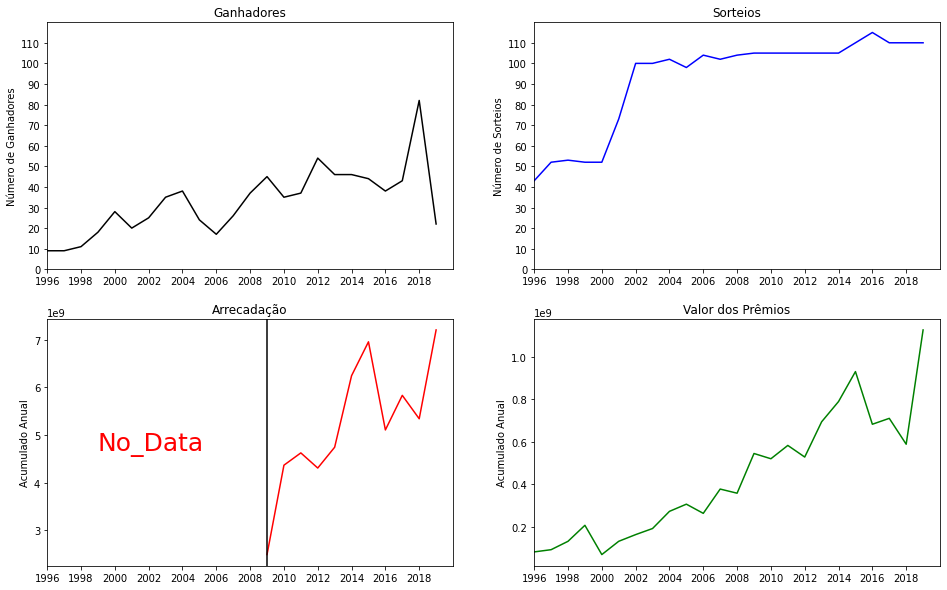

In [50]:
# Gráficos 
ano = mega_sena.Data.dt.year.max() - 1
ano_str = str(ano)

x_lim = ano + 1

# Definindo o tamanho da figura de plotagem
plt.figure(figsize=(16,10))

# Gráfico 1
plt.subplot(221)
plt.plot(ganhadores_ano.loc[:ano_str], color='black')
plt.ylim(0, sorteios_ano.max() + 5)
plt.yticks(range(0, sorteios_ano.max(), 10))
plt.xlim(1996, x_lim)
plt.xticks(range(1996, ano+1, 2))
plt.title('Ganhadores')
plt.ylabel('Número de Ganhadores')

# Gráfico 2
plt.subplot(222)
plt.plot(sorteios_ano.loc[:ano_str], color='blue')
plt.ylim(0, sorteios_ano.max() + 5)
plt.yticks(range(0, sorteios_ano.max(), 10))
plt.xlim(1996, x_lim)
plt.xticks(range(1996, ano+1, 2))
plt.title('Sorteios')
plt.ylabel('Número de Sorteios')

# Gráfico 3
plt.subplot(223)
plt.plot(arrec_ano.loc['2009':ano_str], color='red')
plt.axvline(2009, 0, arrec_ano.max(), color='black')
plt.text(1999, arrec_ano.max() * 0.65, 'No_Data', size=25, color='red')
plt.xlim(1996, x_lim)
plt.xticks(range(1996, ano+1, 2))
plt.title('Arrecadação')
plt.ylabel('Acumulado Anual')

# Gráfico 4
plt.subplot(224)
plt.plot(premios_ano.loc[:ano_str], color='green')
plt.xlim(1996, x_lim)
plt.xticks(range(1996, ano+1, 2))
plt.title('Valor dos Prêmios')
plt.ylabel('Acumulado Anual')

plt.show()

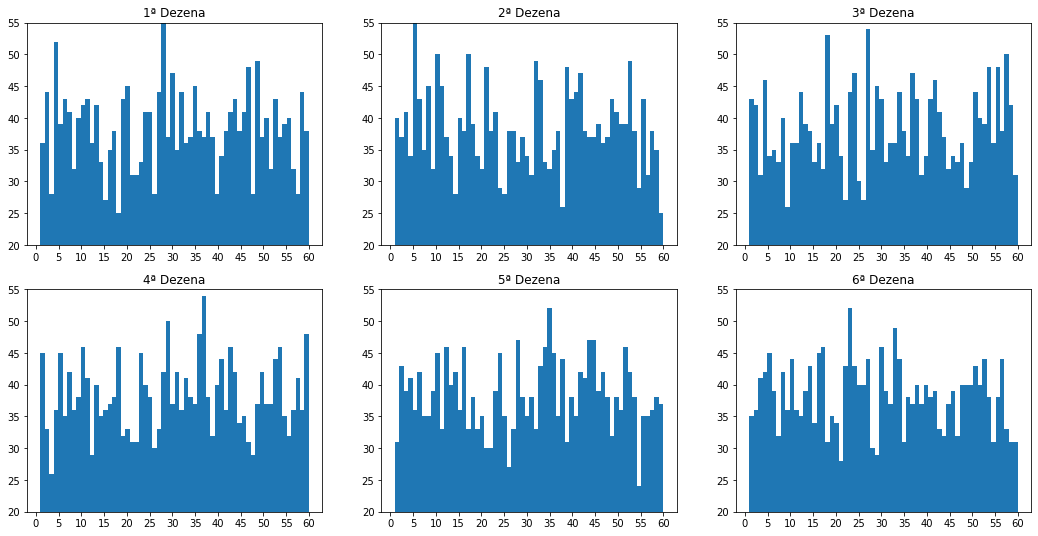

In [51]:
# Avaliando a distribuição de frêquencia entre os números sorteados em cada dezena
mega_dezenas = mega_sena.loc[:, '1_n':'6_n']

plt.figure(figsize=(18,9))

for i, n in enumerate(mega_dezenas.columns):
    plt.subplot(231+i)
    plt.hist(mega_dezenas[n], bins=60)
    plt.xticks(range(0, 61, 5))
    plt.yticks(range(20, 56, 5))
    plt.ylim(20, 55)
    plt.title(f'{i+1}ª Dezena')

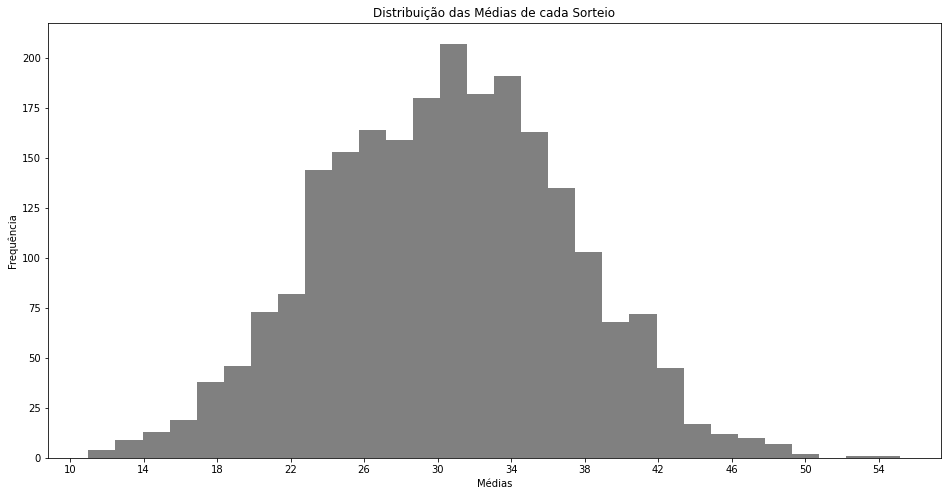

In [52]:
# Avaliando a distribuição das médias entre os 6 números sorteados em cada sorteio.

plt.figure(figsize=(16,8))
plt.hist(mega_dezenas.agg(func=['mean'], axis=1)['mean'], bins=30, color='gray')
plt.xticks(range(10, 58, 4))
plt.title('Distribuição das Médias de cada Sorteio')
plt.xlabel('Médias')
plt.ylabel('Frequência')
plt.show()

In [53]:
# Preparando o dataset para avaliação geral dos números
dezenas = mega_dezenas.reset_index(level=0)

dezenas = dezenas.melt(id_vars='Concurso', value_vars=['1_n', '2_n', '3_n', '4_n', '5_n', '6_n'], var_name='Dezena',
                            value_name='Numero')

dezenas.sort_values(['Concurso', 'Dezena']).reset_index(drop=True).head(12)

,Concurso,Dezena,Numero
0,1,1_n,41
1,1,2_n,5
2,1,3_n,4
3,1,4_n,52
4,1,5_n,30
5,1,6_n,33
6,2,1_n,9
7,2,2_n,39
8,2,3_n,37
9,2,4_n,49


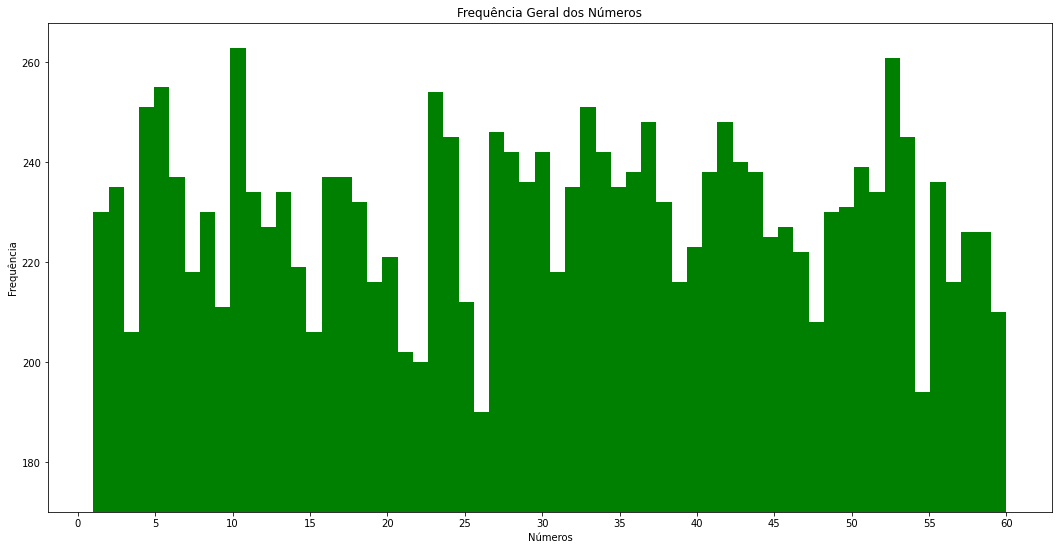

In [54]:
# Avaliando a distribuição de frequência geral dos números, descartando a dezena em que foi sorteado.
y_lim = dezenas.Numero.value_counts().max() + 5

plt.figure(figsize=(18,9))
plt.hist(dezenas['Numero'], bins=60, color='green')
plt.xticks(range(0, 61, 5))
plt.ylim(170, y_lim)
plt.title('Frequência Geral dos Números')
plt.xlabel('Números')
plt.ylabel('Frequência')
plt.show()

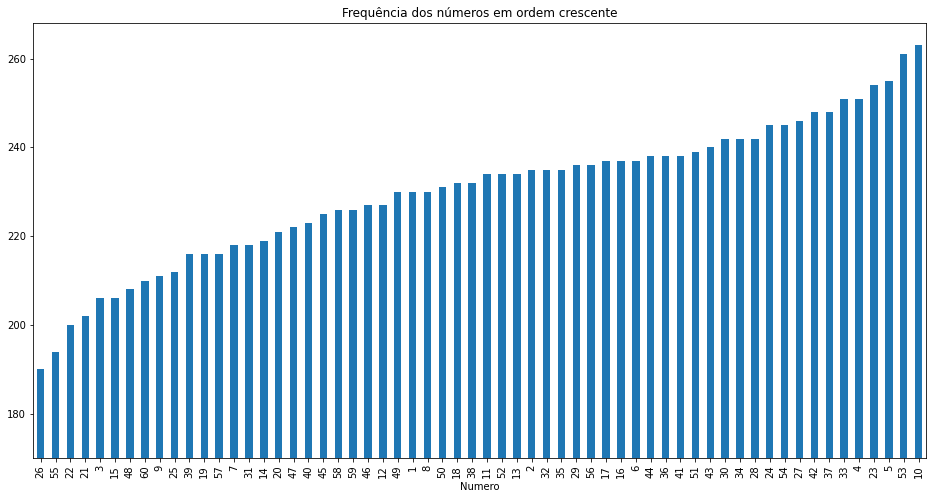

In [55]:
# Organizando o gráfico em ordem crescente de frequência

freq = dezenas.groupby('Numero').count().iloc[:,0]

plt.figure(figsize=(16,8))
freq.sort_values().plot(kind='bar')
plt.title('Frequência dos números em ordem crescente')
plt.ylim(170, y_lim)
plt.show()

In [56]:
# Organizando os dados para facilitar a leitura dos números mais/menos frequentes.
freq_num = freq.sort_values()
freq_num2 = freq_num.reset_index()

menos = []
mais = []

bold = '\033[1m'
clear = '\033[m'         

print(f'{bold}OS NÚMEROS QUE MAIS APARECERAM FORAM:{clear}\n')

for i in range(59, 53, -1):
    print(f'{bold}{freq_num2["Numero"][i]}{clear} que apareceu em {bold}{freq_num2["Concurso"][i]}{clear} sorteios')
    mais.append(freq_num2["Numero"][i])

print()
print(f'{bold}OS NÚMEROS QUE MENOS APARECERAM FORAM:{clear}\n')

for i in range(6):
    print(f'{bold}{freq_num2["Numero"][i]}{clear} que apareceu em {bold}{freq_num2["Concurso"][i]}{clear} sorteios')
    menos.append(freq_num2["Numero"][i])

# Formatando os jogos com números mais e menos frequentes para futura avaliação

mais.sort()
menos.sort()

print()                                                                                                        
print(f'Jogo com números mais frequentes: {mais}')
print(f'Jogo com números menos frequentes: {menos}')  

OS NÚMEROS QUE MAIS APARECERAM FORAM:

10 que apareceu em 263 sorteios
53 que apareceu em 261 sorteios
5 que apareceu em 255 sorteios
23 que apareceu em 254 sorteios
4 que apareceu em 251 sorteios
33 que apareceu em 251 sorteios

OS NÚMEROS QUE MENOS APARECERAM FORAM:

26 que apareceu em 190 sorteios
55 que apareceu em 194 sorteios
22 que apareceu em 200 sorteios
21 que apareceu em 202 sorteios
3 que apareceu em 206 sorteios
15 que apareceu em 206 sorteios

Jogo com números mais frequentes: [4, 5, 10, 23, 33, 53]
Jogo com números menos frequentes: [3, 15, 21, 22, 26, 55]


## Testes Estatíscos:

**Com quantas chances conseguiríamos acertar os 6 números?**

In [16]:
# Importando os pacotes
import random
from numpy import mean  
from time import time

In [17]:
# Inicializando as listas
sorteio = []
lista_tentativas_vitoria = []
lista_acertos = []
jogo = []

# Parâmetros para alterar os testes:

numeros = 60                  #Intevalo de números aleatórios(Ex: MegaSena = 60)
tentativas = 10*10**7         #Quantidade de jogos aleatórios para tentar acertar o sorteio
amostras = 30                 #Quantidade de repetições para gerar um amostra estatística 

# Processamento:
inicio = time() #Timer para medir o tempo de processamento

for i in range(amostras):
    
    sorteio.clear() #Limpando lista
    lista_acertos.clear() #Limpando lista
    count = 0 #Resetando Contador

    #Realiza o sorteio
    sorteio = random.sample(range(1,numeros+1), 6)
    
    #Coloca os números em ordem uma vez que a posição do sorteio não importa.
    sorteio.sort()
    
    #Imprime o sorteio na tela
    print(f'\nJogo Nº:{i+1}')
    print(f'\nSorteio: {sorteio}\n')
    print('-=' * 30)

    #Faz o jogo
    while count < tentativas:
        jogo = random.sample(range(1,numeros+1), 6)
                
        #Coloca o jogo em ordem para comparação com o sorteio.
        jogo.sort()
        
        #Atualiza o contador para que seja avaliada a primeira tentativa
        count += 1
        acertos = 0
        
        #Se o jogo tiver acertado os 6 números,
        #adicionamos o contador na lista de vitória para avaliar quantas tentativas foram necessárias
        #e encerramos a execução
        if jogo == sorteio:
            lista_tentativas_vitoria.append(count)
            break
                           
        #Se o jogo não acertou os seis números, fazemos uma varredura para verificar quantos acertos tivemos
        for j in jogo:
            if j in sorteio:
                acertos += 1
                
        #Reiniciamos o jogo
        jogo.clear()
                
        #Adicionamos na lista de acertos a quantidade de acertos diferentes de 6 para avaliação estatística
        lista_acertos.append(acertos)
    

    # Imprime os dados na tela para avaliação do processo
    if len(lista_acertos) < tentativas:
        print(f'\nConseguimos acertar o jogo com {len(lista_acertos)+1} tentativas!\n')
    else:
        print('\nInfelizmente, não conseguimos acertar os 6 números.\n')
        print(f'Nós tentamos {int(len(lista_acertos)/1000000)} milhões de vezes!!!!\n')
        for i in range(6):
            print(f'''Tivemos {i} acerto(s) em {lista_acertos.count(i)/len(lista_acertos)*100:.2f}%
Total de {lista_acertos.count(i)} jogos\n''')
    print('-=' * 30)

    
# Verifica o tempo de execução
fim = time()
print(f'\nO tempo de execução foi de {(fim - inicio)/60:.2f} minutos!!!\n')


Jogo Nº:1

Sorteio: [17, 31, 39, 52, 53, 54]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Infelizmente, não conseguimos acertar os 6 números.

Nós tentamos 100 milhões de vezes!!!!

Tivemos 0 acerto(s) em 51.60%
Total de 51597374 jogos

Tivemos 1 acerto(s) em 37.89%
Total de 37893006 jogos

Tivemos 2 acerto(s) em 9.48%
Total de 9476214 jogos

Tivemos 3 acerto(s) em 0.99%
Total de 989814 jogos

Tivemos 4 acerto(s) em 0.04%
Total de 42961 jogos

Tivemos 5 acerto(s) em 0.00%
Total de 631 jogos

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Jogo Nº:2

Sorteio: [1, 14, 39, 43, 51, 52]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Conseguimos acertar o jogo com 25869700 tentativas!

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Jogo Nº:3

Sorteio: [15, 27, 46, 48, 54, 57]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Infelizmente, não conseguimos acertar os 6 números.

Nós tentamos 100 milhões de vezes!!!!




Conseguimos acertar o jogo com 9649510 tentativas!

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

O tempo de execução foi de 361.96 minutos!!!



In [37]:
# Completa a lista para totalizar o número de amostras, agregando o valor máximo no caso de não ter acertado.
for i in range(amostras-len(lista_tentativas_vitoria)):
    lista_tentativas_vitoria.append(tentativas)

# Transforma a lista em um série do panda para obter o método 'sample'
vit = pd.Series(lista_tentativas_vitoria)

# Inicializa a lista
boots = []

# Gera amostras aleatórias
for i in range(10000):
    sample = vit.sample(frac=1, replace=True)
    boots.append(sample.mean())

# Avalia o intervalo de confiança das médias das amostras
confidence_interval = pd.Series(boots).quantile([0.025, 0.975])

#Imprime o resultado
print(f'O intervalo de confiança(95%) está entre {confidence_interval[0.025]:0.0f} e {confidence_interval[0.975]:0.0f} tentativas!!!!')

O intervalo de confiança(95%) está entre 36133006 e 60728121 tentativas!!!!


<b>Jogo com 6 Números:</b><br>
* <u>6 acertos:</u>
A probabilidade estipulada pela CEF é de 50.063.860 por jogo. <br>
O valor está dentro do nosso intevalo de confiança que calculou as médias de acertos entre 36.133.006 e 60.728.121 tentativas
<br>
<br>
* <u>5 acertos:</u>
A probabilidade estipulada pela CEF é de 154.518 por jogo.<br>
A média de acertos foi aproximadamente 650 jogos a cada 100.000.000 de tentativas: 1 acerto a cada 153.846 jogos. 
<br>
<br>
* <u>4 acertos:</u>
A probabilidade estipulada pela CEF é de 2.332 por jogo.<br>
A média de acertos foi aproximadamente 43.000 jogos a cada 100.000.000 de tentativas: 1 acerto a cada 2.325 jogos.
<br>
<br>
<b>Conclusão:</b>
Todas as probabilidades ficaram alinhadas com os números divulgados.

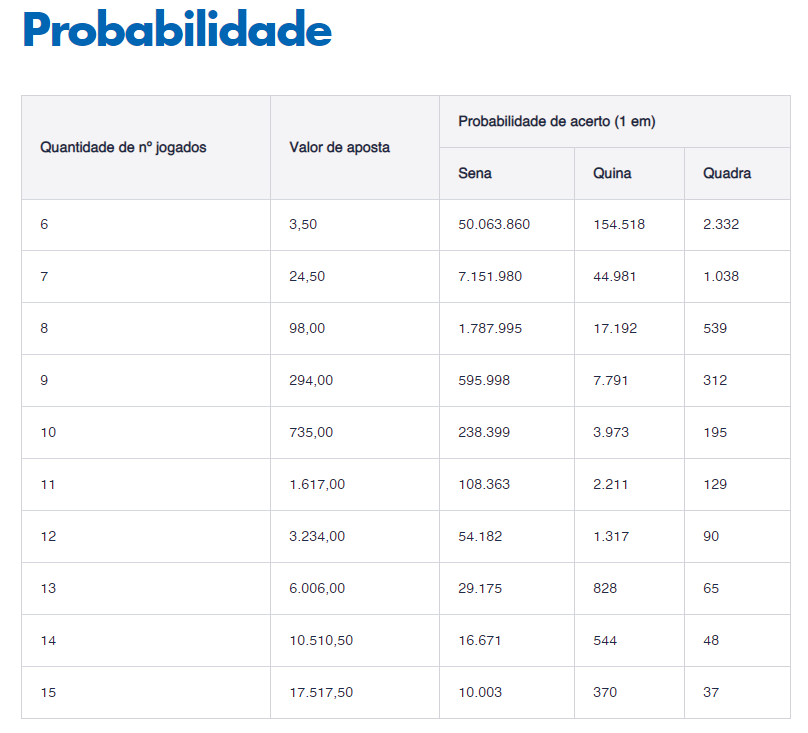

In [39]:
# Tabela de probalidades segundo a Caixa Econômica Federal

from IPython.display import Image
Image("probabilities_table.png")

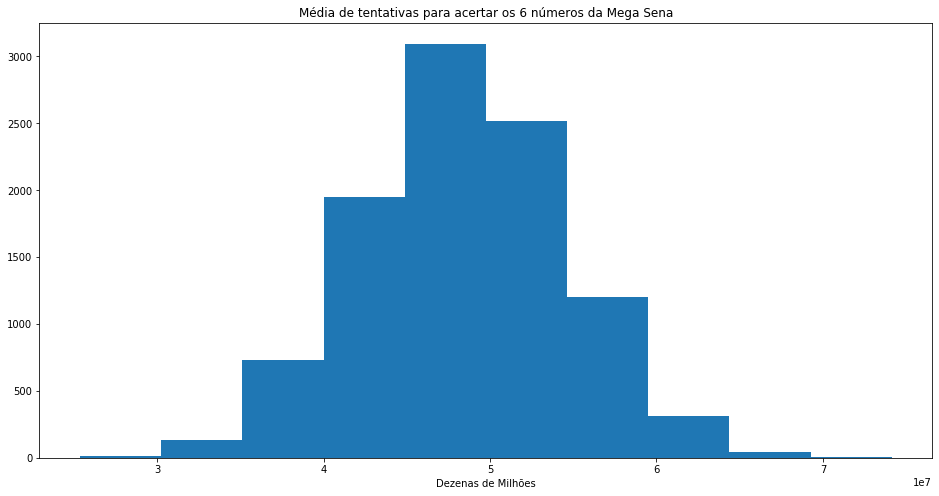

In [19]:
# Gráfico para mostrar a distribuição das médias de tentativas.
# Mais uma vez, conforme esperado, temos uma distribuição normal.

plt.figure(figsize=(16,8))
plt.hist(boots)
plt.title('Média de tentativas para acertar os 6 números da Mega Sena')
plt.xlabel('Dezenas de Milhões')
plt.show()

## Utilizando LSTM para prever um jogo vencedor

In [20]:
# Importando os pacotes
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [21]:
# Organizando os dados para o formato correto de input
num_sorteado = np.array(jogos).flatten()

In [22]:
# Pré-processamento e criação do dataset de treino
seq_in = []
out = []

for i in range(len(num_sorteado)-8):
    seq_in.append(list(num_sorteado[i:i+6]))
    out.append(num_sorteado[i+7])
    
X = np.array(seq_in)
y = np.array(out)

In [23]:
# Dados de entrada organizado a cada 6 dezenas sorteadas
X = X.reshape(X.shape[0], 6, 1)

# Transformando números sorteados em categorias One Hot Encoding
hot = OneHotEncoder(sparse=False, categories='auto')
y_one = hot.fit_transform(y.reshape(len(y), 1))

In [29]:
# Criação e treinamento do modelo
model = Sequential()

model.add(LSTM(36, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(120, activation='elu'))
model.add(Dense(y_one.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X, y_one, epochs=10, verbose=1)

Epoch 1/10
13060/13060 [==============================] - 10s 762us/step - loss: 3.7775 - acc: 0.0410
Epoch 2/10
13060/13060 [==============================] - 9s 688us/step - loss: 3.4201 - acc: 0.0594
Epoch 3/10
13060/13060 [==============================] - 9s 687us/step - loss: 3.3863 - acc: 0.0627
Epoch 4/10
13060/13060 [==============================] - 9s 689us/step - loss: 3.3735 - acc: 0.0629
Epoch 5/10
13060/13060 [==============================] - 9s 689us/step - loss: 3.3647 - acc: 0.0626
Epoch 6/10
13060/13060 [==============================] - 9s 691us/step - loss: 3.3609 - acc: 0.0642
Epoch 7/10
13060/13060 [==============================] - 9s 689us/step - loss: 3.3536 - acc: 0.0653
Epoch 8/10
13060/13060 [==============================] - 9s 690us/step - loss: 3.3538 - acc: 0.0622
Epoch 9/10
13060/13060 [==============================] - 9s 693us/step - loss: 3.3481 - acc: 0.0608 1s - los
Epoch 10/10
13060/13060 [==============================] - 9s 690us/step - loss: 

In [25]:
# Resumo do modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 36)                5472      
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4440      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
Total params: 17,172
Trainable params: 17,172
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Análise preditiva
numeros_previstos = []

for i in range(len(jogos)):
    X_teste = np.array(jogos[i])
    X_teste = X_teste.reshape(1, X_teste.shape[0], 1)
    predicted = model.predict(X_teste)
    numeros_previstos.append(np.argmax(predicted))

# Tentamos organizar os números para prever as dezenas mais prováveis de serem sorteadas.
numeros_previstos = pd.Series(numeros_previstos).unique()
numeros_previstos = list(numeros_previstos)
numeros_previstos.sort()

In [56]:
# Numeros previstos como mais provaveis:
print(numeros_previstos)

q_mais = 0
q_menos = 0

for n in numeros_previstos:
    if n in mais:
        q_mais += 1
    elif n in menos:
        q_menos += 1
        
print(f'\nTemos {q_mais} dos números previstos entre os mais frequentes.')
print(f'\nTemos {q_menos} dos números previstos entre os menos frequentes.')

[9, 10, 11, 12, 13, 15, 17, 22, 26, 31, 35, 58]

Temos 1 dos números previstos entre os mais frequentes.

Temos 4 dos números previstos entre os menos frequentes.


In [57]:
prev = []

for jogo in jogos:
    c = 0
    for n in jogo:
        if n in numeros_previstos:
            c += 1
    if c == 6:
        print(jogo)
        break
    prev.append(c)

print(f'''Utilizando os {len(numeros_previstos)} números mais prováveis previstos pelo modelo,
tivemos uma média de acerto de {sum(prev)/len(prev):.2f} números considerando todos os 2178 sorteios.''')

Utilizando os 12 números mais prováveis previstos pelo modelo,
tivemos uma média de acerto de 1.17 números considerando todos os 2178 sorteios.


## Conclusão:

* Como o fenomeno dos sorteios é completamente aleatório, o modelo não foi capaz de prever os números de forma acertiva. 

* Para avaliar o aprendizado do modelo, a expectativa era que ele fosse enviezado para buscar os números mais frequentes, o que não se mostrou na análise, sendo que 4 dos 12 estão presentes entre os números menos frequentes e apenas 1 entre os mais. 


# FIM!